In [1]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

In [2]:
# Load data

cell_counts = pd.read_csv('immune_cells_counts.csv')
cell_counts

,sample,age,sex,batch,status,B cell,CD4+ T helper,CD4+ T naive / MAIT cells,CD4+ Treg and gluten-responsive,CD8+ memory and tissue-resident activated T cells,...,Innate lymphoid cells (ILC),Macrophages/DC,NKT cells,Plasma cells IgA1 (1),Plasma cells IgA1 (2),Plasma cells IgA2,Plasma cells IgG,Plasma cells IgM,gdT cells,Mast cells
0,CeD1,10,M,A,CeD,44,58,25,42,225,...,1,20,9,47,55,31,20,40,29,0
1,CeD2,14,F,A,CeD,13,53,44,33,141,...,2,15,2,247,158,87,76,43,7,2
2,CeD2,14,F,F,CeD,70,127,81,81,252,...,5,3,9,93,73,48,32,13,13,5
3,CeD3,14,F,A,CeD,4,154,99,49,217,...,1,15,11,25,5,27,14,25,22,1
4,CeD4,17,F,A,CeD,10,102,44,62,172,...,5,40,11,146,191,126,25,70,15,15
5,CeD4,17,F,F,CeD,128,297,318,227,228,...,43,20,46,124,143,138,49,42,53,29
6,Ctrl1,15,F,A,Ctrl,13,134,323,8,7,...,5,33,41,60,66,100,32,39,4,21
7,Ctrl1,15,F,F,Ctrl,13,127,453,19,13,...,10,11,55,21,29,39,22,14,10,35
8,Ctrl2,11,M,F,Ctrl,103,212,277,14,7,...,3,10,33,45,30,26,21,27,5,4
9,Ctrl4,12,M,A,Ctrl,0,125,88,7,12,...,3,27,26,30,31,37,18,13,3,19


In [3]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns = ['sample', 'age', 'sex', 'batch', 'status'])
print(data_all.obs)

   sample  age sex batch status
0    CeD1   10   M     A    CeD
1    CeD2   14   F     A    CeD
2    CeD2   14   F     F    CeD
3    CeD3   14   F     A    CeD
4    CeD4   17   F     A    CeD
5    CeD4   17   F     F    CeD
6   Ctrl1   15   F     A   Ctrl
7   Ctrl1   15   F     F   Ctrl
8   Ctrl2   11   M     F   Ctrl
9   Ctrl4   12   M     A   Ctrl
10  Ctrl5   15   F     A   Ctrl


<AxesSubplot:xlabel='Cell type', ylabel='Proportion'>

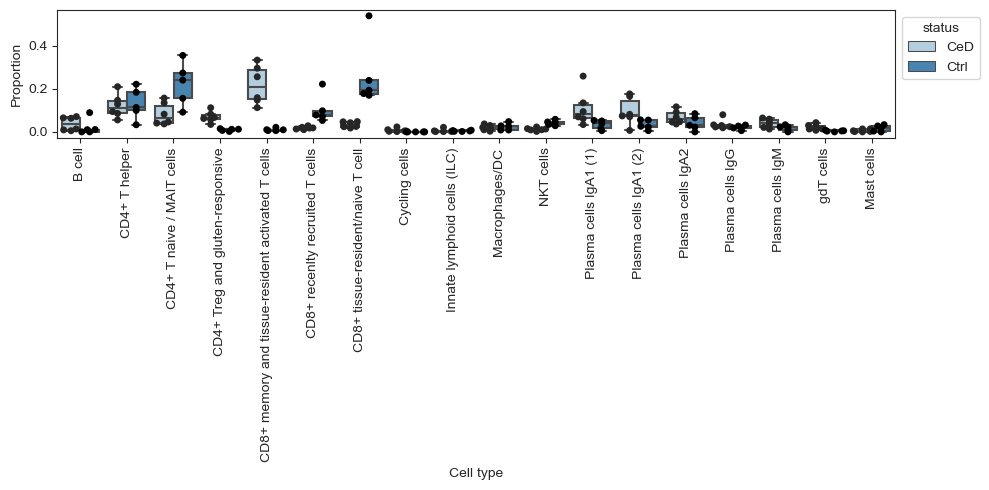

In [4]:
viz.boxplots(data_all, feature_name = 'status', figsize = (10,5), add_dots = True)

In [5]:
# Model
model = mod.CompositionalAnalysis(data_all, formula = "~C(status, Treatment('Ctrl')) + age + sex + batch", reference_cell_type = "automatic")
results = model.sample_hmc(num_results = 400000, num_burnin = 10000)
results.summary()
pd.DataFrame.to_csv(results.effect_df, 'scCODA_immune_effects_summary.csv')

Automatic reference selection! Reference cell type set to Innate lymphoid cells (ILC)
Zero counts encountered in data! Added a pseudocount of 0.5.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


100%|█████████████████████████████████████████████████████████████████████████| 400000/400000 [38:54<00:00, 171.33it/s]


MCMC sampling finished. (2438.774 sec)
Acceptance rate: 28.5%
Compositional Analysis summary:

Data: 11 samples, 18 cell types
Reference index: 8
Formula: ~C(status, Treatment('Ctrl')) + age + sex + batch

Intercepts:
                                                   Final Parameter  \
Cell Type                                                            
B cell                                                      -0.051   
CD4+ T helper                                                1.785   
CD4+ T naive / MAIT cells                                    2.239   
CD4+ Treg and gluten-responsive                             -0.043   
CD8+ memory and tissue-resident activated T cells            0.231   
CD8+ recenlty recruited T cells                              1.770   
CD8+ tissue-resident/naive T cell                            2.381   
Cycling cells                                               -0.861   
Innate lymphoid cells (ILC)                                 -0.494   
Macrophages/